In [144]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [145]:
RSEED = 50
Input_data = make_classification(n_samples=2500, n_features=4, n_informative=2, n_redundant=0, n_repeated=0, 
                                    n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, random_state=RSEED)

X = Input_data[0]
Y = Input_data[1]

print(X.shape)

(2500, 4)


In [146]:
#Create a data frame for the input data
input_dataframe = pd.DataFrame(Input_data[0], columns=['x'+ str(i) for i in range(1,5)])
#column of labels
input_dataframe['y'] = Input_data[1]

In [147]:
input_dataframe.head()

,x1,x2,x3,x4,y
0,-0.334455,0.079387,1.155826,2.027637,0
1,0.884903,-0.361806,0.198131,1.504154,0
2,-1.219976,0.986273,0.299956,1.281841,1
3,-0.857474,-1.475597,0.743428,-1.021293,0
4,-1.349902,-1.264404,0.394280,-0.723553,0


In [148]:
print(X[0:10,:])

[[-0.33445531  0.07938744  1.15582648  2.02763668]
 [ 0.88490348 -0.36180615  0.19813079  1.50415377]
 [-1.21997562  0.9862728   0.29995567  1.28184073]
 [-0.85747423 -1.47559713  0.74342838 -1.02129292]
 [-1.34990231 -1.26440397  0.39428047 -0.723553  ]
 [ 1.17889722  0.97262148  0.24982356 -1.07651131]
 [ 0.24715    -0.09687877  0.53895106 -2.05627676]
 [ 0.03745838  1.3276827  -0.79643937  0.5063198 ]
 [-1.11425197  0.90500296 -0.22370651  0.88377169]
 [ 0.26173801 -0.61207812 -0.30848784 -1.48833858]]


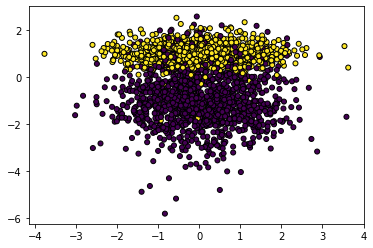

In [149]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k')

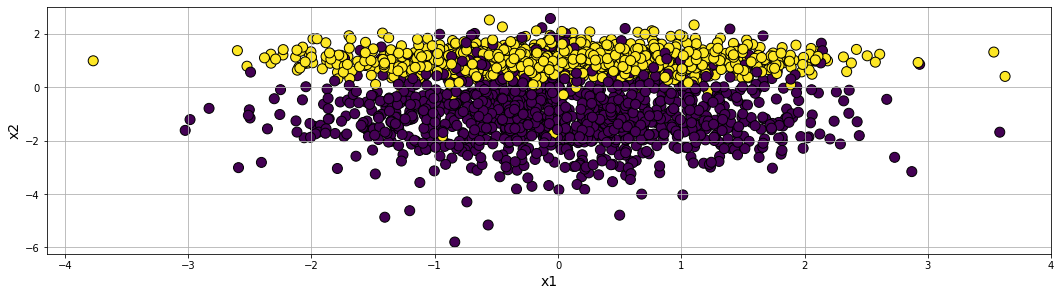

In [150]:
from itertools import combinations
from math import ceil

lst_var=list(combinations(input_dataframe.columns[:-1],4))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(input_dataframe[var1],input_dataframe[var2],s=100,c=input_dataframe['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

In [151]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest

In [152]:
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
print(clf)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


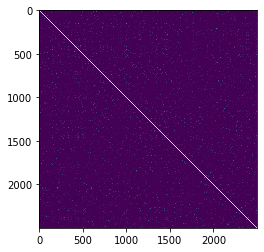

In [153]:
clf.fit(X)
sim_mat = clf.transform()
plt.imshow(sim_mat)

In [63]:
cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(Y, predict_labels)

print("Adjusted Rand Score:", score)

Adjusted Rand Score: 0.6867871702442968


In [64]:
#Setting n_clusters = 2 increases accuracy

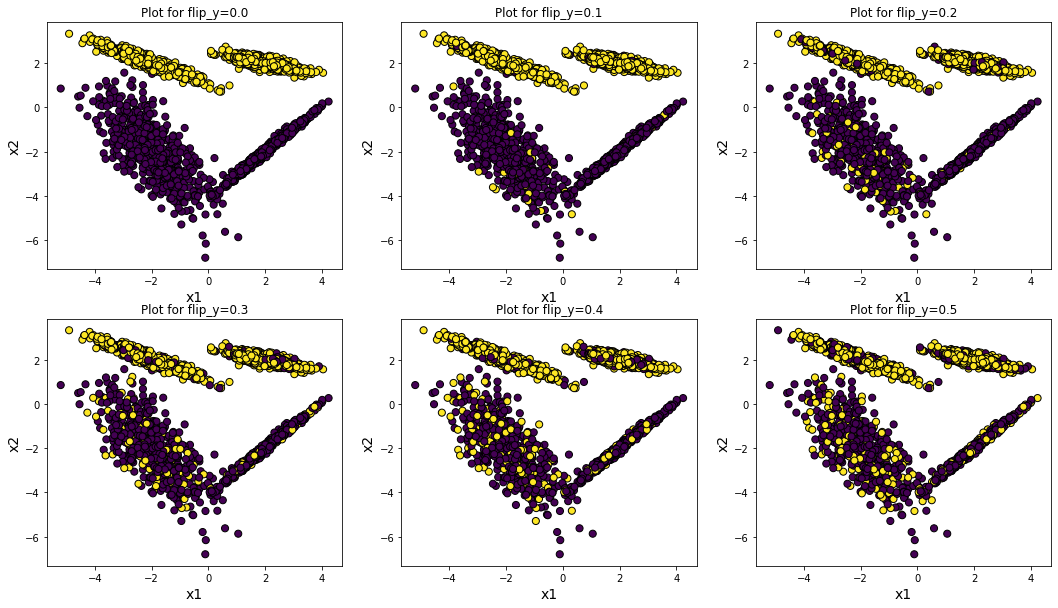

In [167]:
sims = []
plt.figure(figsize=(18,10))
for i in range(6):
    noise_data = make_classification(n_samples=2500, n_features=4, n_informative=2, n_redundant=0, n_repeated=0, 
                                n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.1*i, class_sep=2.0, 
                                hypercube=True, shift=0.0, scale=1.0, shuffle=False, random_state=RSEED)
    
    X_n = noise_data[0]
    Y_n = noise_data[1]
    
    clf1 = UnsupervisedRandomForest(projection_matrix="RerF", random_state=RSEED)
    clf1.fit(X_n)
    sims.append(clf1.transform())
    
    df = pd.DataFrame(noise_data[0],columns=['x'+str(i) for i in range(1,5)])
    df['y'] = noise_data[1]
    
    plt.subplot(2,3,i+1)
    
    plt.title(f"Plot for flip_y={round(0.1*i,2)}")
    
    plt.scatter(df['x1'],df['x2'],s=50,c=df['y'],edgecolor='k')
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    

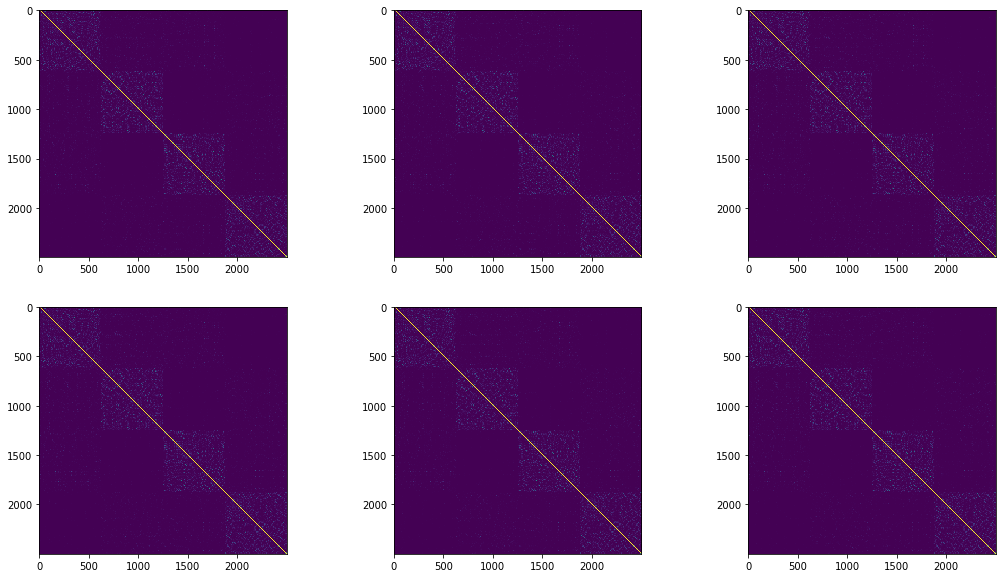

In [168]:
plt.figure(figsize=(18,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    
    plt.imshow(sims[i])
    

In [195]:
cluster1 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
for i in range(6):
    labels = cluster1.fit_predict(sims[i])
    adj_score.append(adjusted_rand_score(Y,labels))
print(adj_score)


[None, None, None, None, None, None, -0.0003195080376391084, -0.0003644379582104781, -8.239266048510646e-05, -0.00015836757214698536, -0.0002737831718776417, -7.706507400072217e-05, -0.0003195080376391084, -0.0003644379582104781, -8.239266048510646e-05, -0.00015836757214698536, -0.0002737831718776417, -7.706507400072217e-05]


In [99]:
from sklearn.datasets import make_circles

In [196]:
circle_input = make_circles(n_samples=100, shuffle=True, noise=0.15, random_state=RSEED, factor=0.6)

In [197]:
circle_df = pd.DataFrame(circle_input[0],columns=['x'+str(i) for i in range(1,3)])
circle_df['y'] = circle_input[1]

In [198]:
X1 = circle_input[0]
Y1 = circle_input[1]
print(X1.shape)
print(Y1.shape)

(100, 2)
(100,)


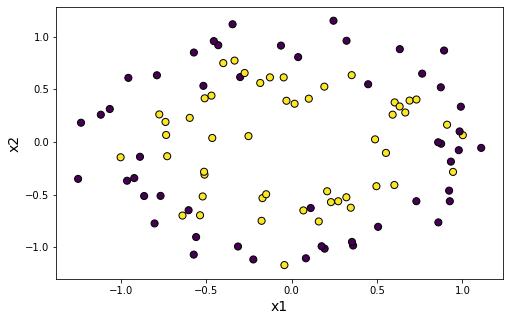

In [199]:
plt.figure(figsize=(8,5))
plt.scatter(circle_df['x1'],circle_df['x2'],c=circle_df['y'],s=50,edgecolors='k')

plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)

plt.show()

Adjusted rand score -0.7834641821676471


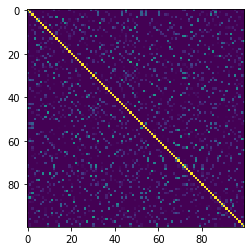

In [194]:
clf.fit(X1)
output_sim = clf.transform()
plt.imshow(output_sim)
    
cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
predicted = cluster.fit_predict(output_sim)
score = adjusted_rand_score(Y1, predict_labels)
print("Adjusted rand score", score*100)
